**Write a program to predict the class of user.**

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("Mall_Customers.csv")
print(df)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [2]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.drop(['CustomerID'], axis=1,inplace=True)
print(df.columns)

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [6]:
df['Genre'].replace('Male',0, inplace=True)
df['Genre'].replace('Female',1,inplace=True)

In [7]:
print(df['Genre'])

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Genre, Length: 200, dtype: int64


In [9]:
df['Age']=df['Age']/max(df['Age'])
df['Annual Income (k$)']=df['Annual Income (k$)']/max(df['Annual Income (k$)'])
df['Spending Score (1-100)']=df['Spending Score (1-100)']/max(df['Spending Score (1-100)'])

In [10]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=10)
kmeans.fit(df)

KMeans(n_clusters=10)

In [11]:
kmeans.inertia_

6.9806300229226315

In [12]:
kmeans.cluster_centers_

array([[ 1.00000000e+00,  3.63736264e-01,  1.87535093e-01,
         8.13519814e-01],
       [-2.22044605e-16,  8.44047619e-01,  3.53406326e-01,
         4.29713805e-01],
       [ 1.00000000e+00,  3.99428571e-01,  4.18686131e-01,
         4.75959596e-01],
       [-2.22044605e-16,  3.60714286e-01,  3.01094891e-01,
         6.15319865e-01],
       [-3.33066907e-16,  5.71428571e-01,  5.82614466e-01,
         1.36822773e-01],
       [ 1.00000000e+00,  4.59863946e-01,  6.28084811e-01,
         8.24915825e-01],
       [ 1.00000000e+00,  7.73626374e-01,  3.95845031e-01,
         4.94560995e-01],
       [-2.22044605e-16,  4.75396825e-01,  6.35847526e-01,
         8.35016835e-01],
       [ 1.00000000e+00,  6.25510204e-01,  6.80917623e-01,
         2.08513709e-01],
       [ 1.00000000e+00,  5.93406593e-01,  1.93711398e-01,
         2.09013209e-01]])

In [13]:
#The elbow method
#To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

In [14]:
sse

[78.0586821609293,
 28.680329316229322,
 22.666649014081745,
 17.14151578006798,
 14.696510220166788,
 12.867729780852468,
 11.440027722970282,
 9.518709597764156,
 8.125195957579034,
 6.983422247649433]

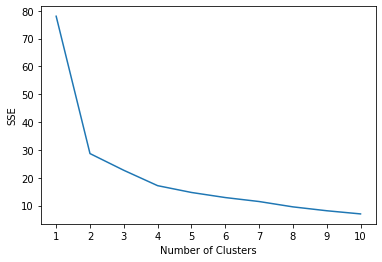

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [16]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=8)
kmeans.fit(df)

KMeans()

In [17]:
ypred=kmeans.predict(df)
print(ypred)

[5 5 0 7 7 7 2 7 6 7 6 7 2 7 3 5 2 5 6 7 5 5 2 5 2 5 2 5 2 7 6 7 3 5 2 7 2
 7 2 7 2 5 6 7 2 7 2 7 7 7 2 5 7 6 2 6 2 6 7 6 6 5 2 2 6 5 2 2 5 7 6 2 2 2
 6 5 2 6 7 2 6 5 6 2 7 6 2 7 7 2 2 5 6 2 0 5 2 7 6 5 7 2 6 5 6 7 2 6 6 6 6
 7 2 5 7 7 2 2 2 2 5 0 2 1 0 4 3 1 3 1 3 1 0 4 3 4 0 1 3 4 0 1 0 4 3 1 3 4
 0 1 3 1 0 4 0 4 3 4 3 4 2 4 3 4 3 4 3 4 0 1 3 1 3 1 0 4 3 1 3 1 0 4 3 4 0
 1 0 1 0 4 0 4 3 4 0 4 0 1 3 1]
